In [20]:
import pandas as pd
from dateutil.parser import parse as parseDate
import re
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import math

In [21]:
# d2LevelNames = {}
# d3LevelNames = {}

# data = []
# headers = None

# with open('./data/attend.csv', 'r') as f:
#     lc = 0
    
#     for line in f:
        
#         line = line.strip()
#         line= re.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", line)
        
#         if headers is None:
#             headers = line
#             continue
        
#         workId = int(line[0])
#         groupId = int(line[1])
#         userId = int(line[2])
        
#         d2LevelName = line[3]
#         if d2LevelName not in d2LevelNames:
#             d2LevelNames[d2LevelName] = len(d2LevelNames)
#         d2LevelId = d2LevelNames[d2LevelName]
        
#         d3LevelName = line[4]
#         if d3LevelName not in d3LevelNames:
#             d3LevelNames[d3LevelName] = len(d3LevelNames)
#         d3LevelId = d3LevelNames[d3LevelName]
        
#         onlineId = True if line[5] == 'Да' else False
#         date = parseDate(line[6])
        
#         dataItem = {
#             'workId': workId,
#             'groupId': groupId,
#             'userId': userId,
#             'd2LevelId': d2LevelId,
#             'd3LevelId': d3LevelId,
#             'online': onlineId,
#             'date': date
#         }
        
#         data.append(dataItem)
        
#         lc += 1

# pkl.dump(d2LevelNames, open('./data/d2LevelNames.pkl', 'wb'))
# pkl.dump(d3LevelNames, open('./data/d3LevelNames.pkl', 'wb'))

# len(df['workId'].unique()), len(df['d2LevelId'].unique()), len(df['d3LevelId'].unique())
# df = pd.DataFrame.from_records(data)
# df.to_csv('./data/attendShort.csv')

In [5]:
import pickle as pkl
import pandas as pd

d2LevelNames = pkl.load(open('./data/d2LevelNames.pkl', 'rb'))
d3LevelNames = pkl.load(open('./data/d3LevelNames.pkl', 'rb'))
df = pd.read_csv('./data/attendShort.csv')
df['date'] = df['date'].apply(parseDate)

In [43]:
d2LevelNamesReverse = {v: k for k, v in d2LevelNames.items()}
d3LevelNamesReverse = {v: k for k, v in d3LevelNames.items()}

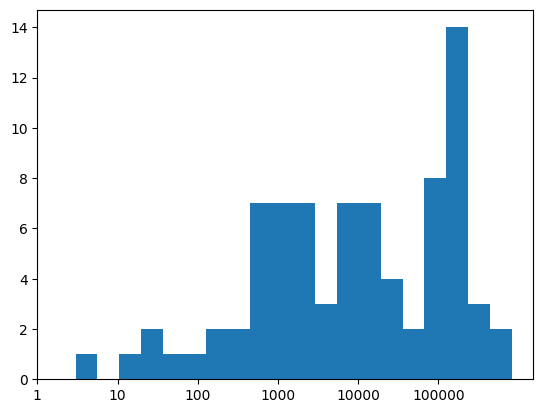

In [25]:
_ = plt.hist(np.log10(df.groupby('d2LevelId').agg({'userId': 'count'})['userId']), bins = 20)
_ = plt.xticks(range(math.ceil(_[1].max())), [10 ** x for x in range(math.ceil(_[1].max()))])

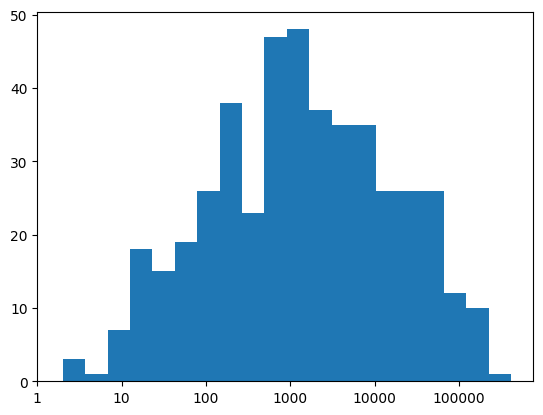

In [26]:
_ = plt.hist(np.log10(df.groupby('d3LevelId').agg({'userId': 'count'})['userId']), bins = 20)
_ = plt.xticks(range(math.ceil(_[1].max())), [10 ** x for x in range(math.ceil(_[1].max()))])

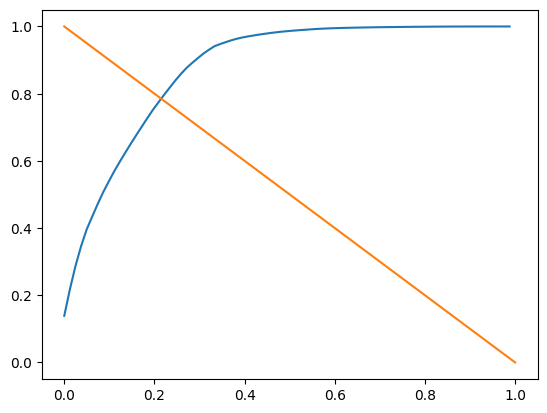

In [27]:
x = sorted(df.groupby('d2LevelId').agg({'userId': 'count'})['userId'])[::-1]
xSum = sum(x)

xCum = []

for xx in x:
    xCum.append((xCum[-1] + xx) if len(xCum) > 0 else xx)

xCum = [x / xSum for x in xCum]

plt.plot([i / len(x) for i in range(len(xCum))], xCum)
plt.plot([0, 1], [1, 0])

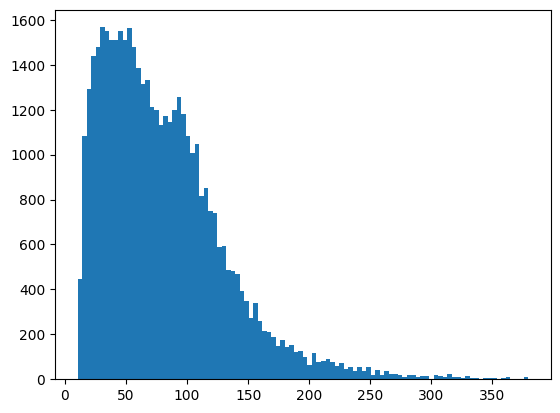

In [49]:
dff = df.groupby('userId').agg({'date': ['min', 'max', 'count']})

dff = dff[dff[('date', 'count')] > 20]

dff['meanDateRange'] = (dff[('date', 'max')] - dff[('date', 'min')]) / dff[('date', 'count')] / np.timedelta64(1, 'h')

_ = plt.hist(dff['meanDateRange'], bins = 100)

In [35]:
(df.groupby('userId').agg({'date': 'count'})['date'] > 200).sum()

8719

In [36]:
dff = df.groupby('userId').agg({'d2LevelId': list})

In [37]:
mat = np.zeros((max(d2LevelNames.values()), max(d2LevelNames.values())))

In [38]:
x = list(dff['d2LevelId'])

In [40]:
dfg = pd.read_csv('./data/users.csv')
dfg = dfg[['уникальный номер', 'пол']].rename(columns = {'уникальный номер': 'userId', 'пол': 'gender'})
df = df.merge(dfg, on = 'userId', how = 'inner')

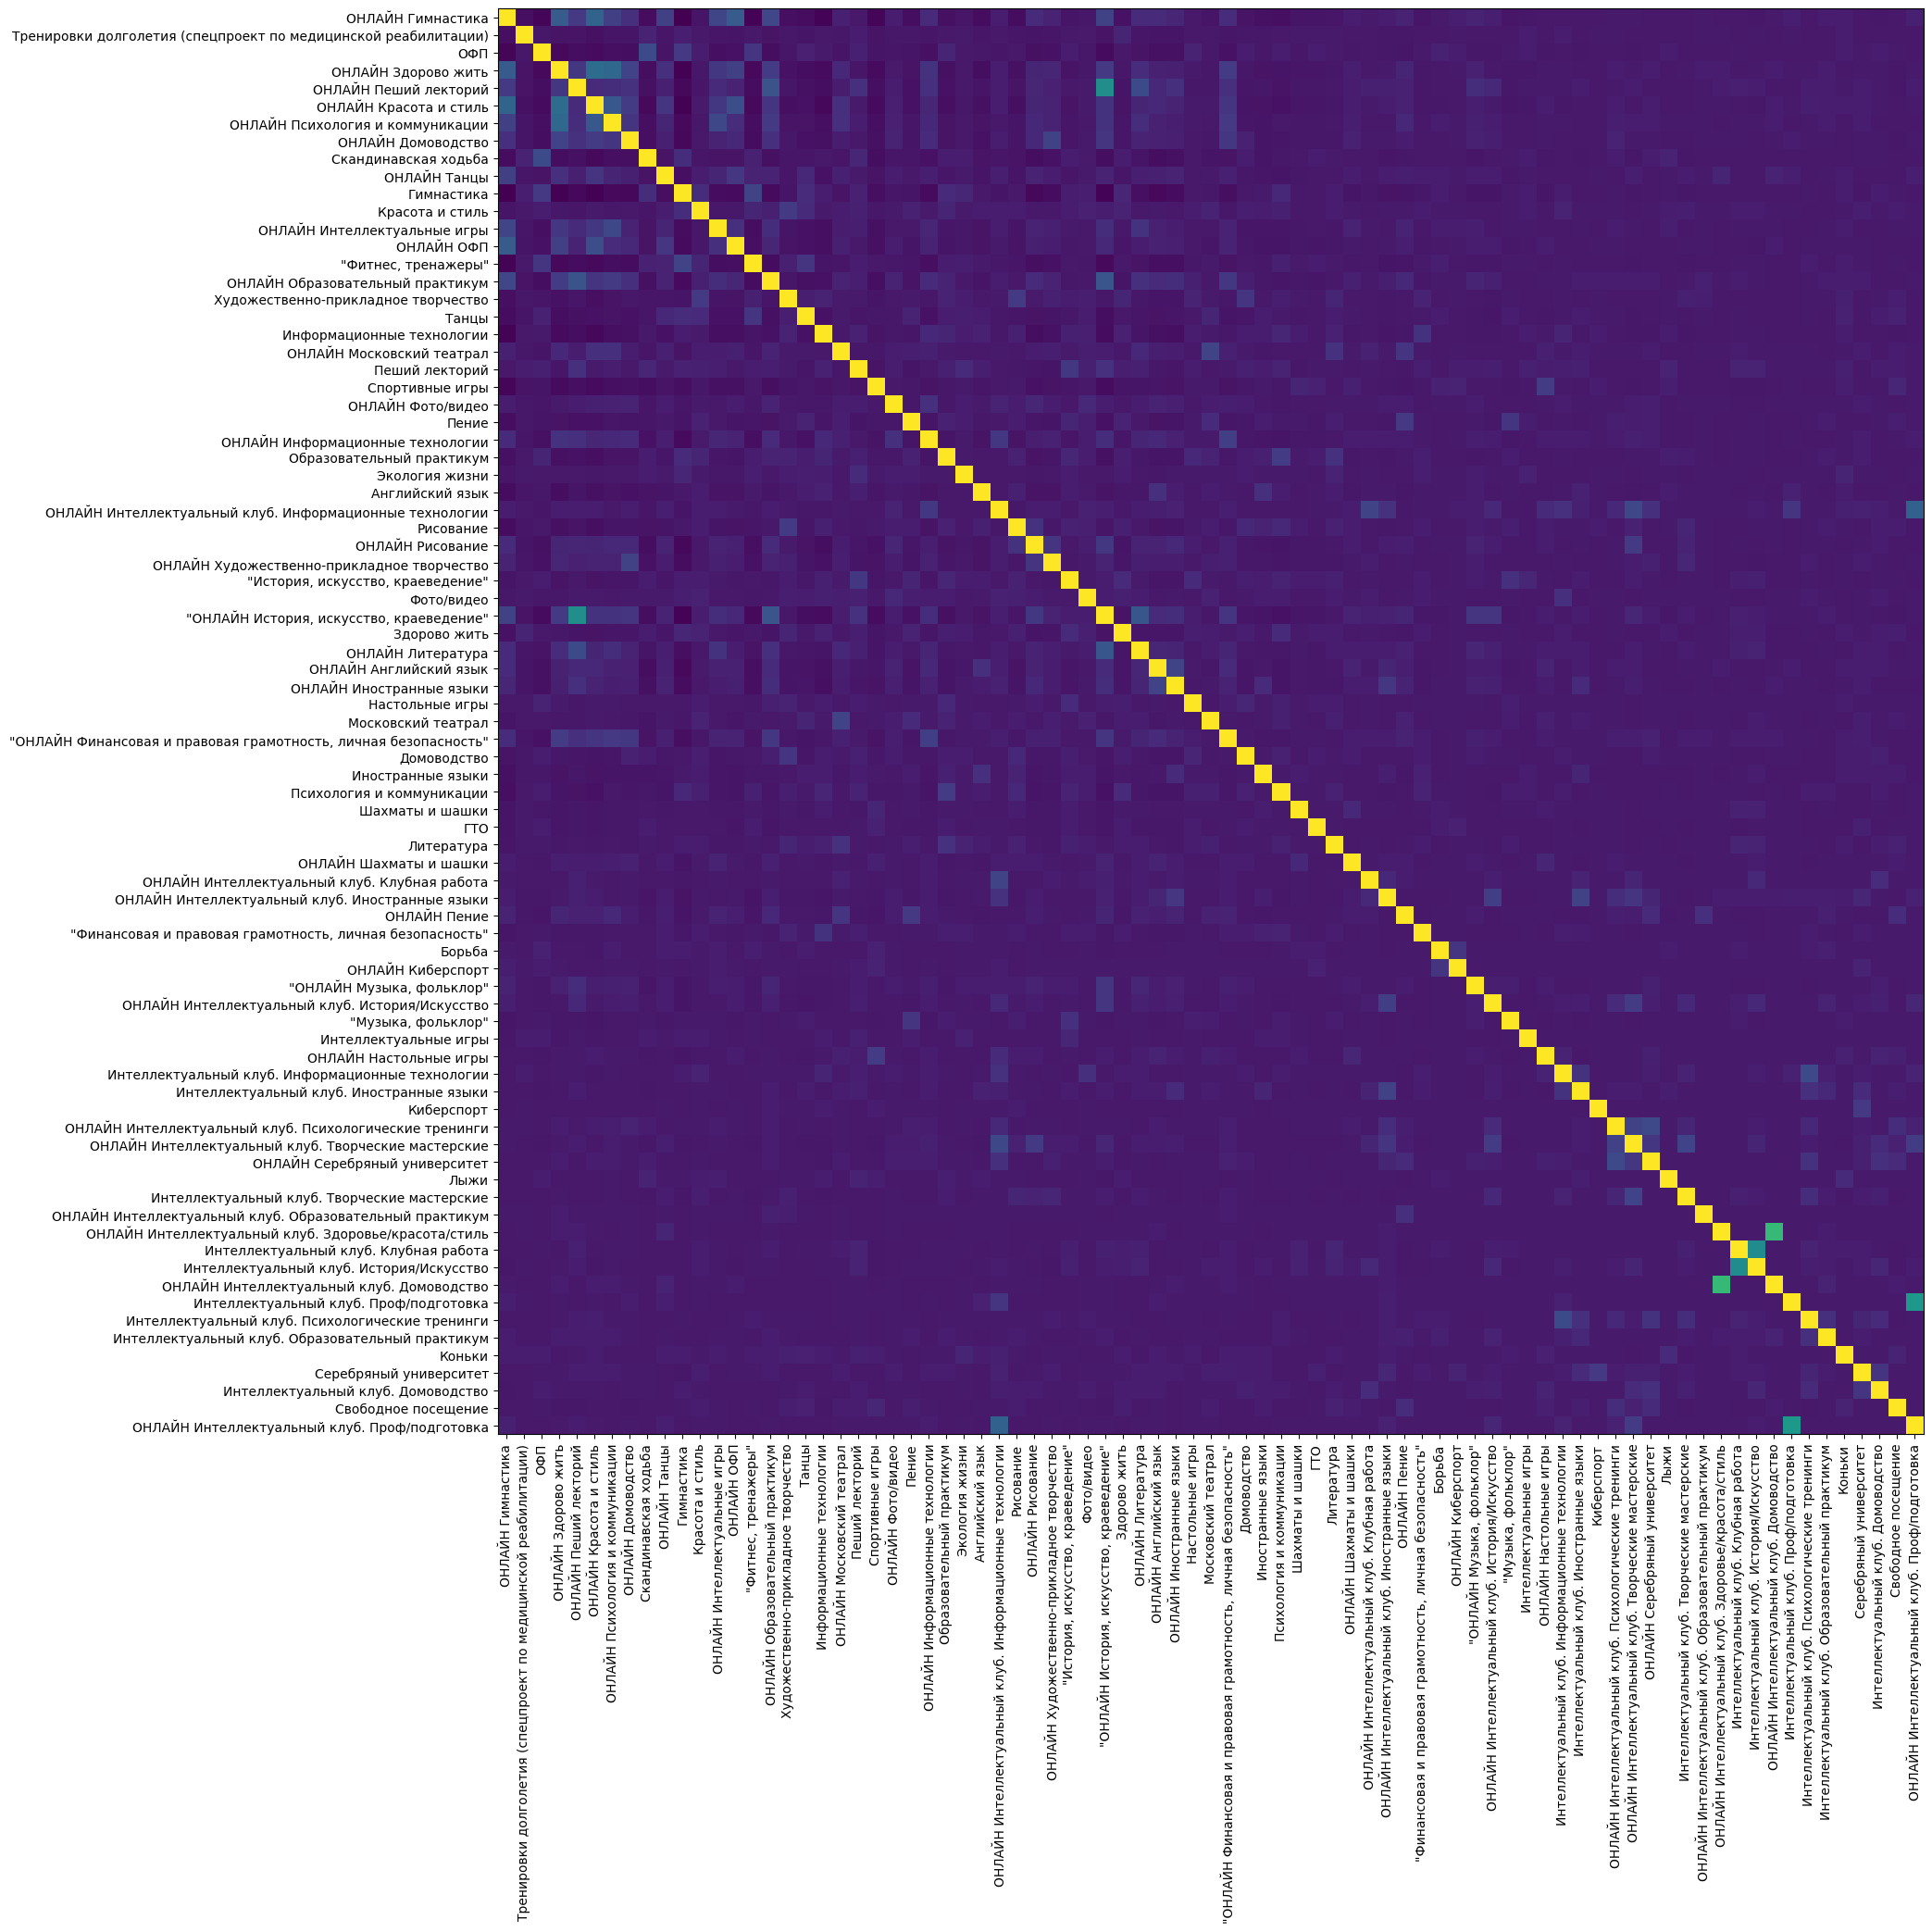

In [138]:
plt.figure(figsize = (20, 20))

# df_ = df[df['gender'] == 'Мужчина']
df_ = df
dff = pd.pivot_table(df_, index = 'userId', columns = 'd2LevelId', values = 'date', aggfunc = 'count').fillna(0)

dffCorr = dff.corr()

plt.imshow(dffCorr.values)
_ = plt.xticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns], rotation = 90)
_ = plt.yticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns])

plt.savefig('./out/d2LevelAff.png', dpi = 200)

0 ['Тренировки долголетия (спецпроект по медицинской реабилитации)']
1 ['ОФП', 'Скандинавская ходьба']
2 ['ОНЛАЙН Гимнастика', 'ОНЛАЙН Здорово жить', 'ОНЛАЙН Красота и стиль', 'ОНЛАЙН Психология и коммуникации', 'ОНЛАЙН Домоводство', 'ОНЛАЙН Танцы', 'ОНЛАЙН Интеллектуальные игры', 'ОНЛАЙН ОФП', 'ОНЛАЙН Информационные технологии', 'ОНЛАЙН Художественно-прикладное творчество', '"ОНЛАЙН Финансовая и правовая грамотность, личная безопасность"']
3 ['Гимнастика', '"Фитнес, тренажеры"', 'Танцы']
4 ['Красота и стиль', 'Художественно-прикладное творчество', 'Рисование', 'Домоводство']
5 ['Информационные технологии', '"Финансовая и правовая грамотность, личная безопасность"']
6 ['ОНЛАЙН Московский театрал', 'Московский театрал']
7 ['Образовательный практикум', 'Иностранные языки', 'Психология и коммуникации', 'Литература']
8 ['Пеший лекторий', '"История, искусство, краеведение"', 'Здорово жить', 'Настольные игры', '"Музыка, фольклор"', 'Интеллектуальные игры']
9 ['ОНЛАЙН Пеший лекторий', 'ОНЛАЙН

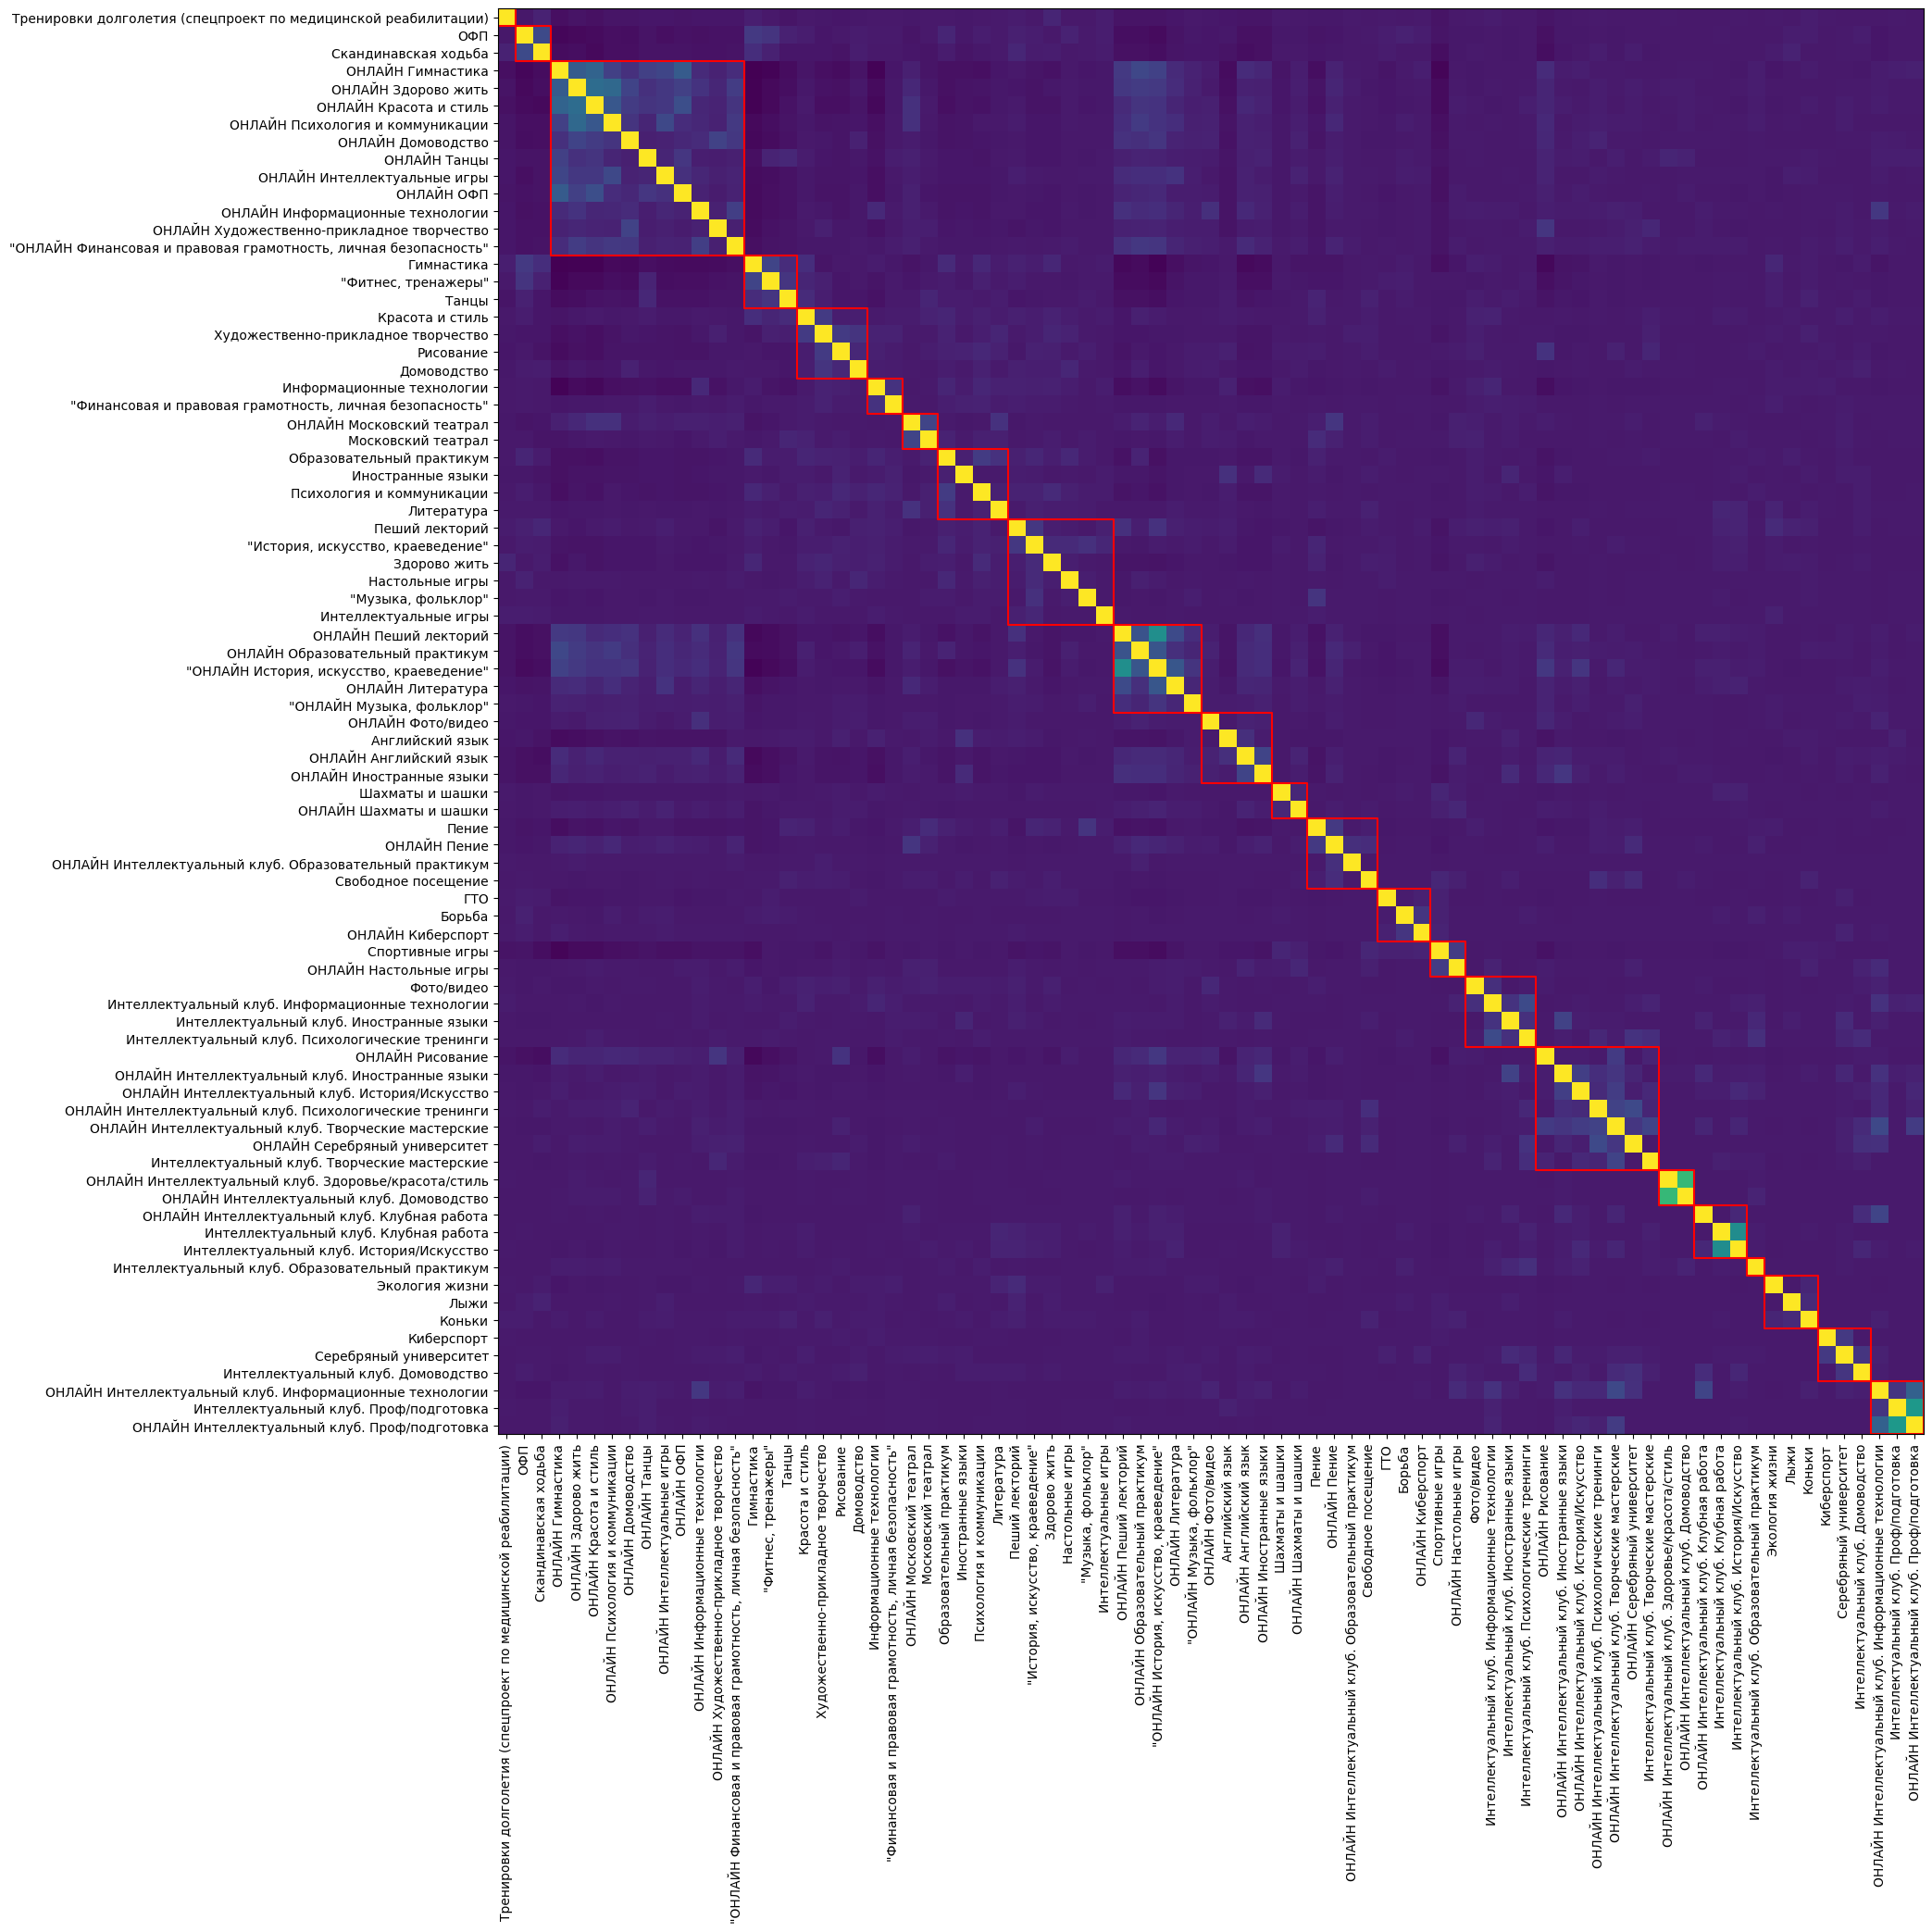

In [139]:
from sklearn.cluster import AffinityPropagation
import numpy as np
X = dffCorr.values
clustering = AffinityPropagation(damping = 0.97, random_state=5, affinity = 'precomputed').fit(X)

d2LevelNamesReverse = {v : k for k, v in d2LevelNames.items()}

for i in range(clustering.labels_.max()):
    print(i, [d2LevelNamesReverse[j] for j in np.where(clustering.labels_ == i)[0]])
    
columns_ = []
clusters_ = []

for c in set(clustering.labels_):
    columns_ += list(dffCorr.columns[np.where(clustering.labels_ == c)])
    clusters_.extend([c] * (clustering.labels_ == c).sum())
    
clusters_ = np.array(clusters_)

plt.figure(figsize = (20, 20))

dffCorr = dff[columns_].corr()

plt.imshow(dffCorr.values)
_ = plt.xticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns], rotation = 90)
_ = plt.yticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns])

for c in set(clustering.labels_):
    xMin, xMax = np.min(np.where(clusters_ == c)) - 0.5, np.max(np.where(clusters_ == c)) + 0.5
    plt.plot([xMin, xMin, xMax, xMax, xMin], [xMin, xMax, xMax, xMin, xMin], color = 'red')
    
#plt.savefig('./out/d2LevelAffClustered.png', dpi = 200)

/home/immichail/anaconda3/envs/rg/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0 ['ОНЛАЙН Гимнастика', 'ОНЛАЙН Здорово жить', 'ОНЛАЙН Домоводство', 'Гимнастика', 'Красота и стиль', '"Фитнес, тренажеры"', 'Информационные технологии', 'ОНЛАЙН Фото/видео', 'ОНЛАЙН Информационные технологии', 'ОНЛАЙН Рисование', 'ОНЛАЙН Литература', '"ОНЛАЙН Финансовая и правовая грамотность, личная безопасность"', 'ГТО', 'ОНЛАЙН Интеллектуальный клуб. Иностранные языки', 'Борьба', 'Интеллектуальный клуб. Информационные технологии', 'ОНЛАЙН Интеллектуальный клуб. Творческие мастерские', 'ОНЛАЙН Серебряный университет', 'Лыжи', 'ОНЛАЙН Интеллектуальный клуб. Здоровье/красота/стиль', 'Свободное посещение']
1 ['ОНЛАЙН Образовательный практикум', 'ОНЛАЙН Английский язык', 'Литература', 'ОНЛАЙН Интеллектуальный клуб. История/Искусство', 'Киберспорт', 'Интеллектуальный клуб. Творческие мастерские', 'Интеллектуальный клуб. Проф/подготовка', 'Серебряный университет']
2 ['ОНЛАЙН Психология и коммуникации', 'Образовательный практикум', 'Экология жизни', '"ОНЛАЙН История, искусство, краеведение

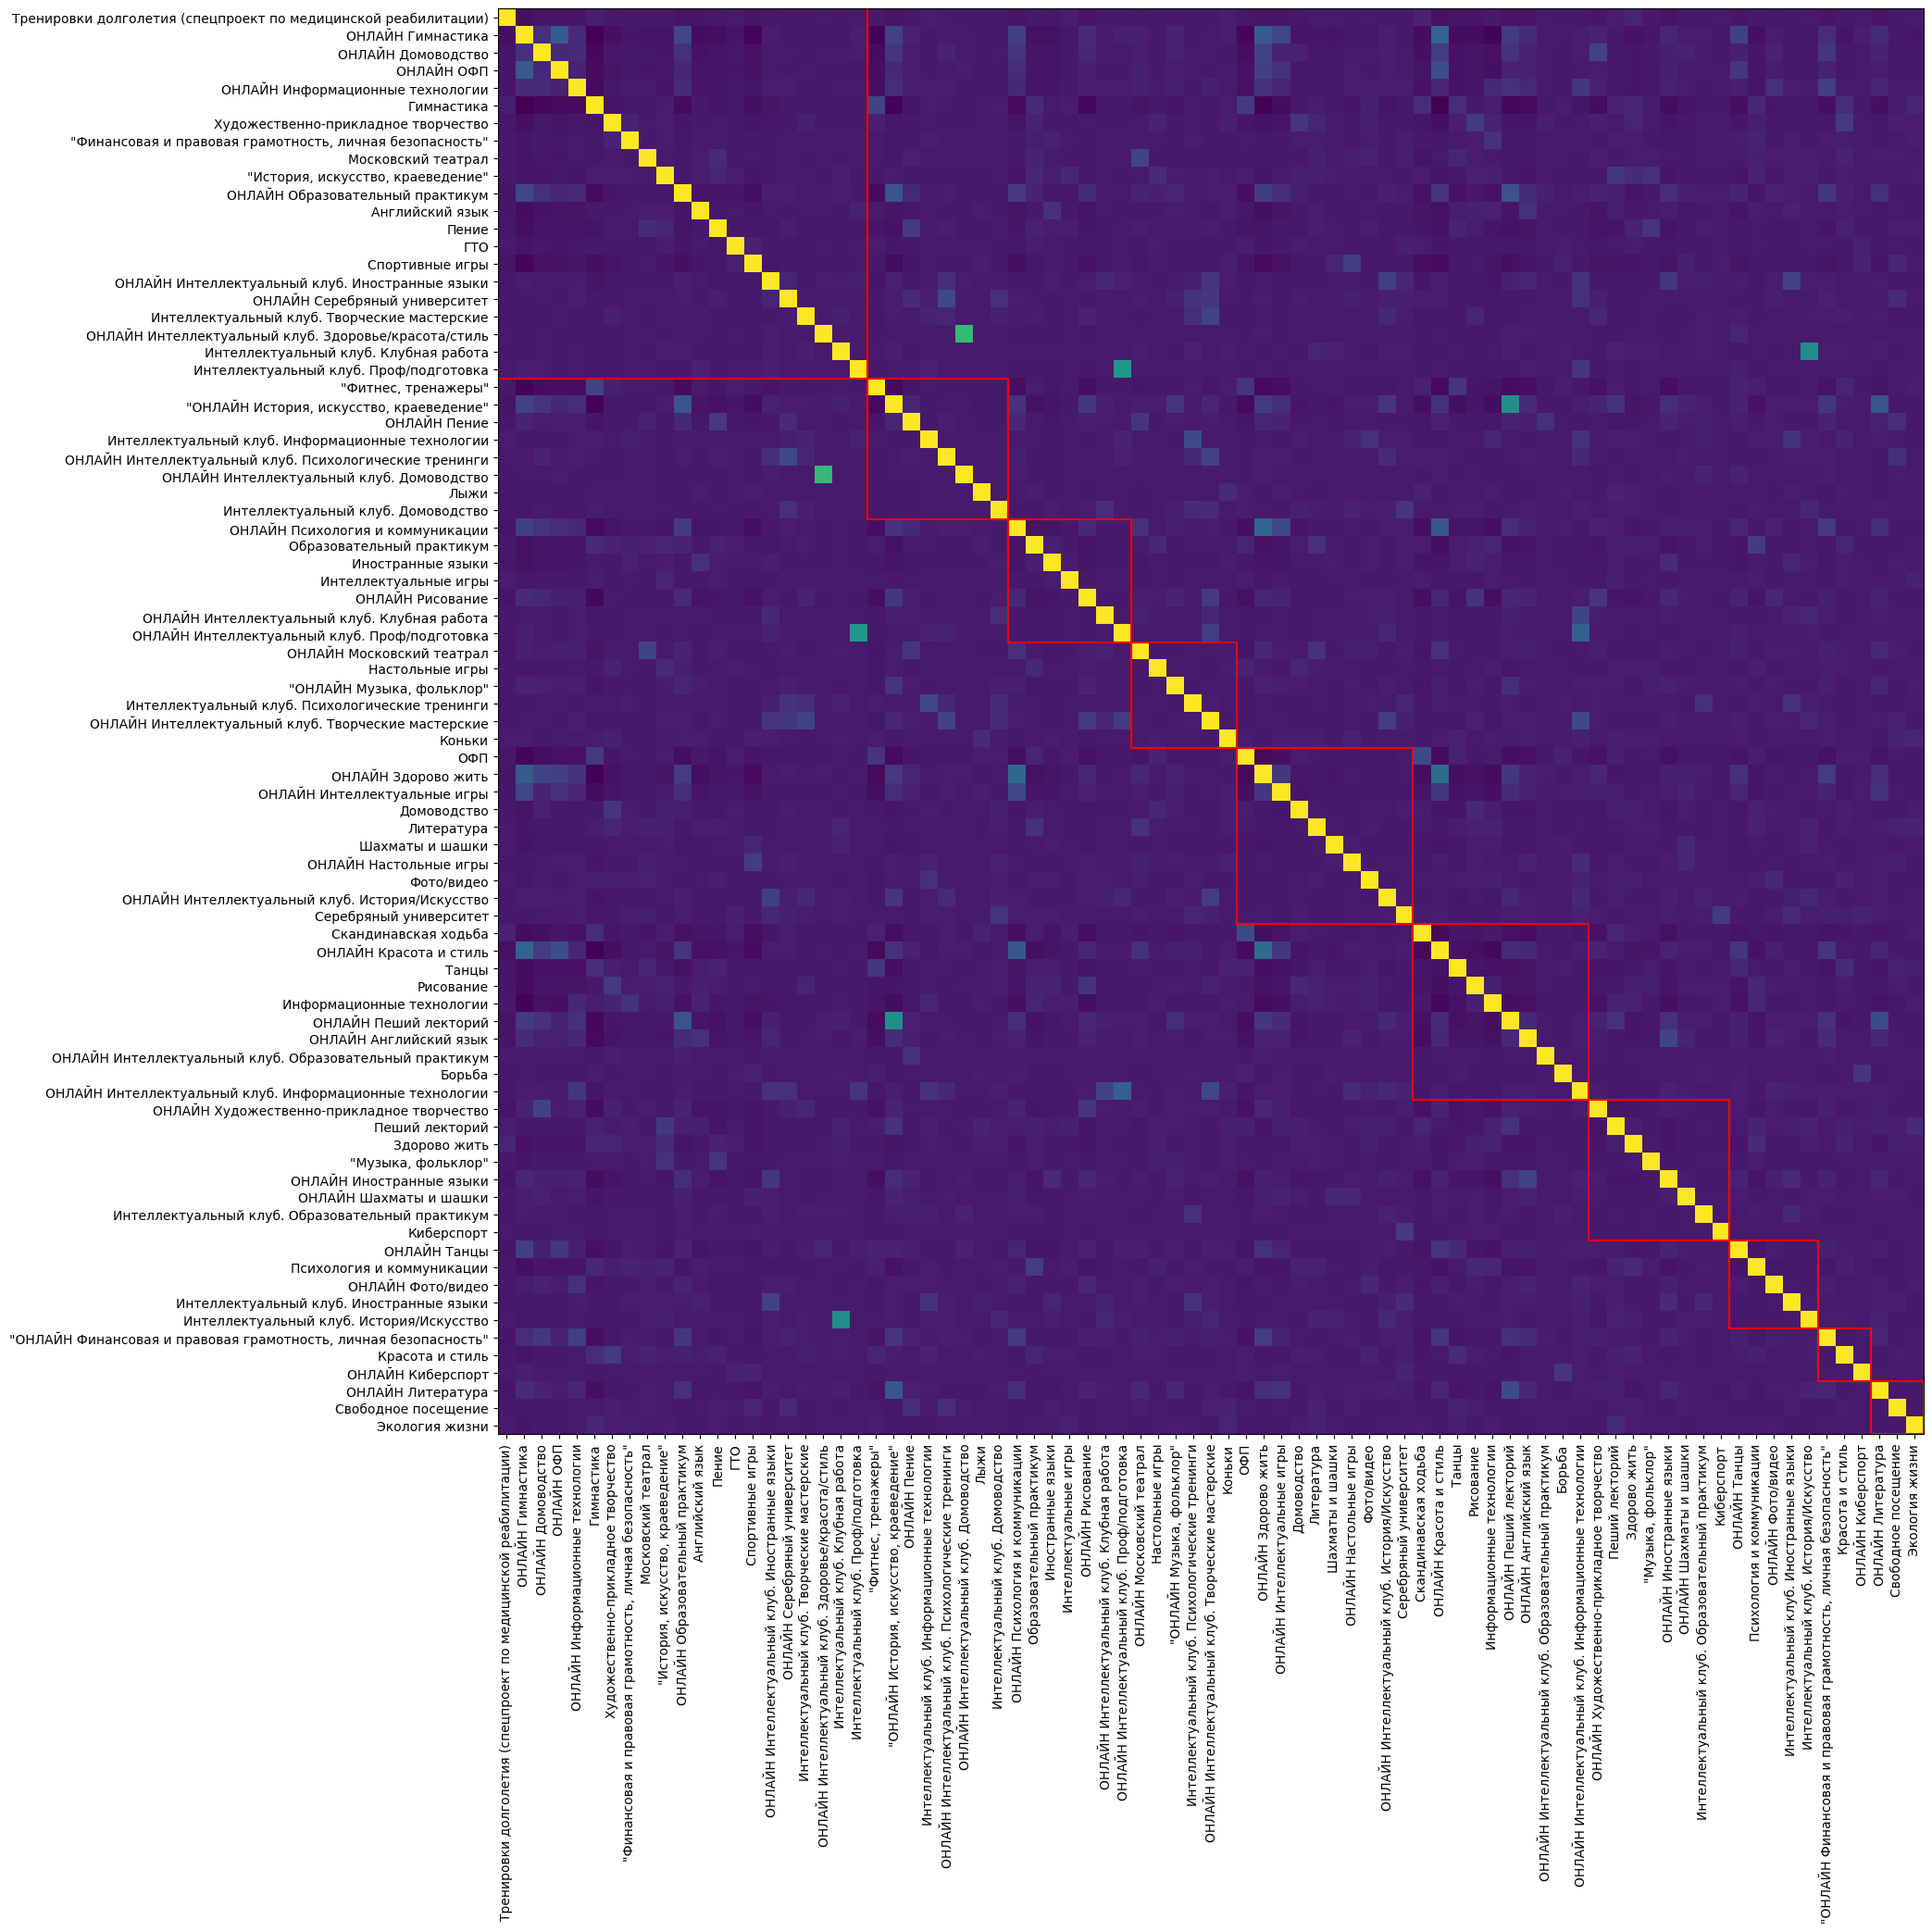

In [140]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = dffCorr.values
clustering = AgglomerativeClustering(n_clusters = 10, affinity = 'precomputed', linkage = 'average').fit(X)

d2LevelNamesReverse = {v : k for k, v in d2LevelNames.items()}

for i in range(clustering.labels_.max()):
    print(i, [d2LevelNamesReverse[j] for j in np.where(clustering.labels_ == i)[0]])
    
columns_ = []
clusters_ = []

for c in set(clustering.labels_):
    columns_ += list(dffCorr.columns[np.where(clustering.labels_ == c)])
    clusters_.extend([c] * (clustering.labels_ == c).sum())
    
clusters_ = np.array(clusters_)

plt.figure(figsize = (20, 20))

dffCorr = dff[columns_].corr()

plt.imshow(dffCorr.values)
_ = plt.xticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns], rotation = 90)
_ = plt.yticks(range(len(dffCorr.columns)), [d2LevelNamesReverse[i] for i in dffCorr.columns])

for c in set(clustering.labels_):
    xMin, xMax = np.min(np.where(clusters_ == c)) - 0.5, np.max(np.where(clusters_ == c)) + 0.5
    plt.plot([xMin, xMin, xMax, xMax, xMin], [xMin, xMax, xMax, xMin, xMin], color = 'red')
    
#plt.savefig('./out/d2LevelAffClustered.png', dpi = 200)

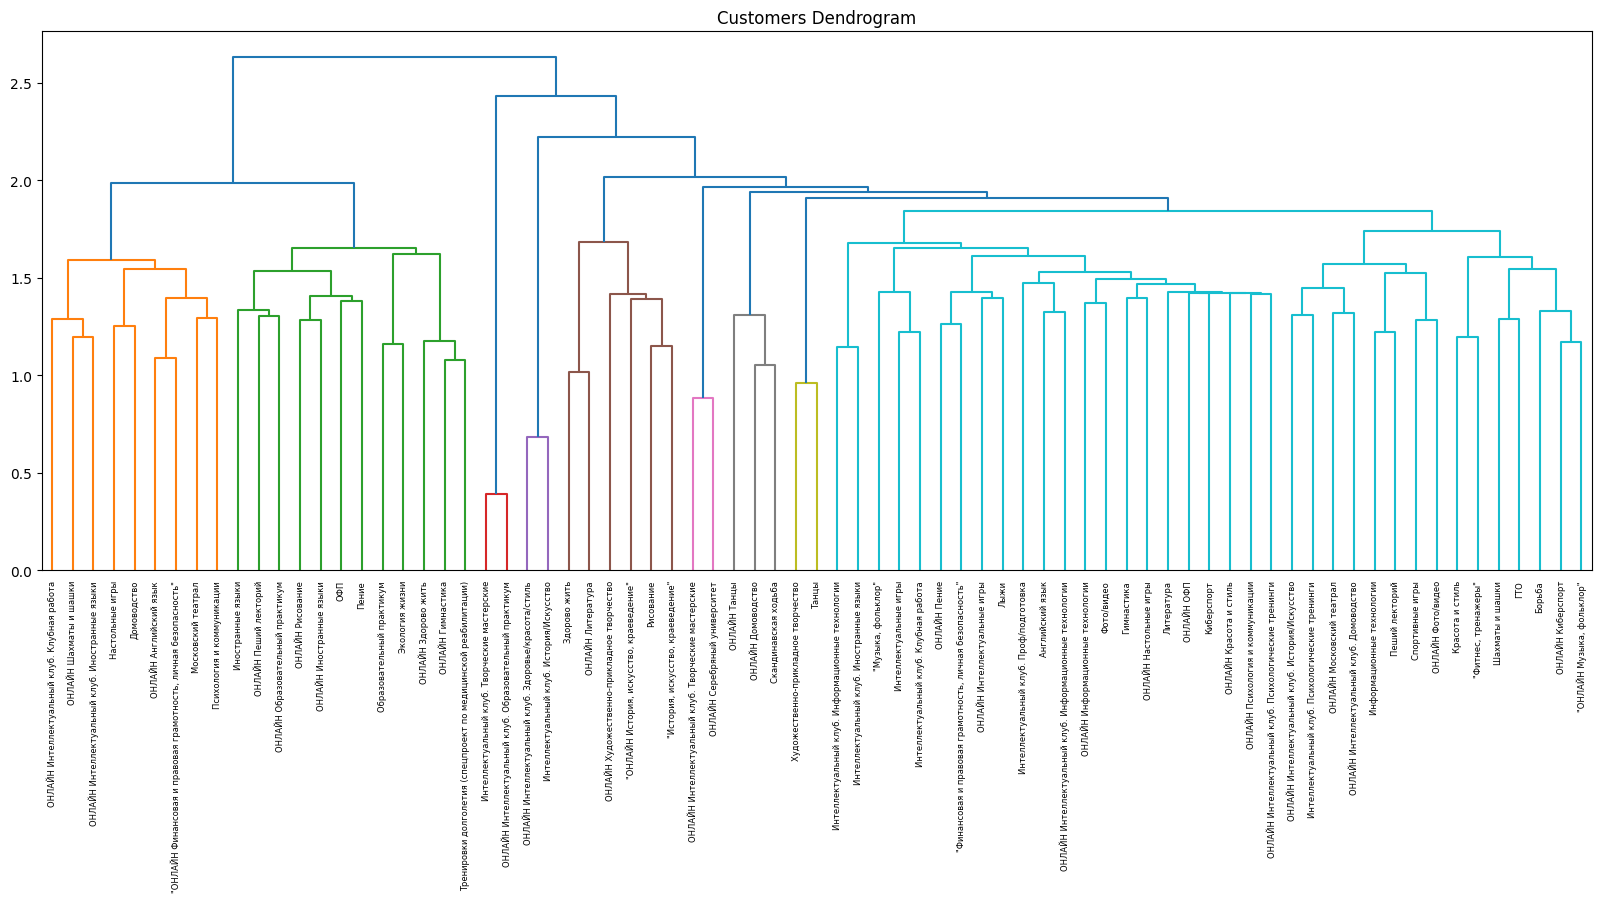

In [102]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(dffCorr.values, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)

_, ticks = plt.xticks()
ticks = [int(t.get_text()) for t in ticks]
__ = plt.xticks(_, [d2LevelNamesReverse[t] for t in ticks])

plt.savefig('./out/d2LevelNamesDendrogram.png', dpi = 200, bbox_inches='tight')

In [79]:
t = ticks[0]
t.get_text()

'49'

In [69]:
clusters

array([[ 67.        ,  68.        ,   0.39223104,   2.        ],
       [ 69.        ,  71.        ,   0.68400773,   2.        ],
       [ 64.        ,  65.        ,   0.88368031,   2.        ],
       [ 16.        ,  17.        ,   0.96314814,   2.        ],
       [ 35.        ,  36.        ,   1.01862963,   2.        ],
       [  7.        ,   8.        ,   1.05110425,   2.        ],
       [  0.        ,   1.        ,   1.08017645,   2.        ],
       [ 37.        ,  41.        ,   1.08680173,   2.        ],
       [ 60.        ,  61.        ,   1.14709329,   2.        ],
       [ 29.        ,  32.        ,   1.1486386 ,   2.        ],
       [ 25.        ,  26.        ,   1.16278497,   2.        ],
       [ 54.        ,  55.        ,   1.1694081 ,   2.        ],
       [  3.        ,  81.        ,   1.17675895,   3.        ],
       [ 11.        ,  14.        ,   1.19473186,   2.        ],
       [ 48.        ,  50.        ,   1.19826375,   2.        ],
       [ 18.        ,  20

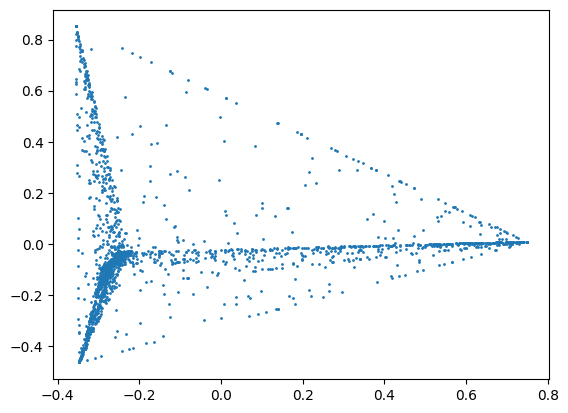

In [318]:
from sklearn.decomposition import PCA

dfx = (dff.values.transpose() / dff.values.sum(axis = 1)).transpose()
pca = PCA(n_components=10).fit(dfx)

dft = pca.transform(dfx)

plt.plot(dft[:, 0], dft[:, 1], 'o', alpha = 1, ms = 1)

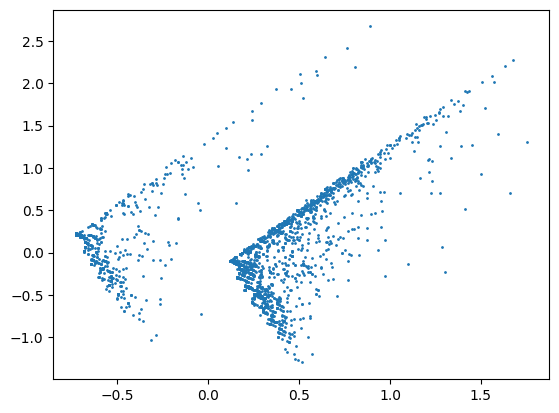

In [319]:
from sklearn.decomposition import PCA

dfx = (dff.values > 0)
pca = PCA(n_components=10).fit(dfx)

dft = pca.transform(dfx)

plt.plot(dft[:, 0], dft[:, 1], 'o', alpha = 1, ms = 1)

In [141]:
import sys
import os

os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"
sys.path.append('/home/immichail/anaconda3/lib/python3.8/site-packages')

import umap

In [145]:
from sklearn.preprocessing import StandardScaler


reducer = umap.UMAP()

scaled_penguin_data = StandardScaler().fit_transform(dff)

In [146]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape


OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


ValueError: cannot assign slice from input of different size

(50906, 81)